Вам необходимо загрузить набор данных «**subset-covid-data.csv**», содержащий данные о количестве случаев и смертей, связанных с пандемией **COVID-19**, для разных стран. https://github.com/DataRepo2019/Data-files или  https://github.com/DataRepo2019/Data-files/blob/master/subset-covid-data.csv    



# **ЗАДАНИЕ 1**
Напишите функцию / индексатор / атрибут в Pandas для:

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# 1.1	Импорта данных из файла HTML.
#
url = "https://github.com/DataRepo2019/Data-files/raw/master/subset-covid-data.csv"
df = pd.read_csv(url)
df.head(5)

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0


In [5]:
# 1.2	Экспорта данных в файл Excel.
# ваш код
df.to_excel('covid_data.xlsx', index=False)

In [6]:
# 1.3	Выбора данных с использованием позиции индекса.
# ваш код
# выбор строки с позицией индекса 0
row_0 = df.iloc[0]

# выбор элемента в первой строке и первом столбце
element_00 = df.iloc[0, 0]

display(element_00)
row_0

'Afghanistan'

country         Afghanistan
continent              Asia
date             2020-04-12
day                      12
month                     4
year                   2020
cases                    34
deaths                    3
country_code            AFG
population       37172386.0
Name: 0, dtype: object

In [10]:
# 1.4	Выбора данных по метке.
# ваш код
# выбор данных по метке индекса 'index_label'
data_by_index_label = df.loc[1]
# выбор данных по метке индекса и имени столбца
value_alternative = df.at[0, 'country']

display(data_by_index_label)
display(value_alternative)

country            Albania
continent           Europe
date            2020-04-12
day                     12
month                    4
year                  2020
cases                   17
deaths                   0
country_code           ALB
population       2866376.0
Name: 1, dtype: object

'Afghanistan'

In [11]:
# 1.5	Замены нулевых значений медианой.
# ваш код
# заменяем 0 пустым значением, для того, чтобы исключить случай Me = 0, т.к задание заменить 0
df.replace(0, np.nan, inplace=True)
median_values = df.median()
df.fillna(median_values, inplace=True)

<ipython-input-11-091d2b7b0001>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_values = df.median()


In [12]:
# 1.6	Переименования столбцов.
# ваш код
df.rename(columns={'country': 'country_new',
                   'continent': 'continent_new',
                   'date': 'date_new'},
          inplace=True)

df.head()

,country_new,continent_new,date_new,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34.0,3.0,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17.0,5.0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64.0,19.0,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21.0,2.0,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,37.0,5.0,AGO,30809762.0


In [14]:
# 1.7	Получения количества строк и столбцов в DataFrame.
# ваш код
df.shape

(206, 10)

In [18]:
# 1.8	Преобразования в широкоформатный формат с помощью функции поворота.
# ваш код
wide_df = df.pivot_table(index='country_new', columns=['year', 'month', 'day'], values=['cases', 'deaths'])
wide_df.head(5)

cases           deaths          
year         2020             2020          
month           1   4            1   4      
day            18  11    12     18  11    12
country_new                                 
Afghanistan   NaN NaN  34.0    NaN NaN   3.0
Albania       NaN NaN  17.0    NaN NaN   5.0
Algeria       NaN NaN  64.0    NaN NaN  19.0
Andorra       NaN NaN  21.0    NaN NaN   2.0
Angola        NaN NaN  37.0    NaN NaN   5.0

In [20]:
# 1.9	Выполнения внутреннего соединения двух таблиц.
# ваш код
# создадим 2 таблицы для объединения
df1 = pd.DataFrame({
    'key': ['A', 'B', 'C', 'D'],
    'value_df1': [1, 2, 3, 4]
})

df2 = pd.DataFrame({
    'key': ['B', 'D', 'E', 'F'],
    'value_df2': [5, 6, 7, 8]
})

# объединяем
result = pd.merge(df1, df2, on='key', how='inner')
result

,key,value_df1,value_df2
0,B,2,5
1,D,4,6


In [21]:
# 1.10	Изменение типа данных серии.
# ваш код
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country_new    206 non-null    object 
 1   continent_new  206 non-null    object 
 2   date_new       206 non-null    object 
 3   day            206 non-null    int64  
 4   month          206 non-null    int64  
 5   year           206 non-null    int64  
 6   cases          206 non-null    float64
 7   deaths         206 non-null    float64
 8   country_code   202 non-null    object 
 9   population     206 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 16.2+ KB


In [22]:
# заменим date_new на data_time
df['date_new'] = pd.to_datetime(df['date_new'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country_new    206 non-null    object        
 1   continent_new  206 non-null    object        
 2   date_new       206 non-null    datetime64[ns]
 3   day            206 non-null    int64         
 4   month          206 non-null    int64         
 5   year           206 non-null    int64         
 6   cases          206 non-null    float64       
 7   deaths         206 non-null    float64       
 8   country_code   202 non-null    object        
 9   population     206 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 16.2+ KB


# **ЗАДАНИЕ 2**
Функция **df.describe()** возвращает следующие сводные статистические значения: количество, минимум, максимум, стандартное отклонение, процентили и средние значения.


In [24]:
# 2.1 Какой параметр вы бы добавили, чтобы получить следующее:
# количество уникальных значений, значение, которое встречается чаще всего,
# и частота этого значения?

# ваш код
stats = {
    'уникальные': df.nunique(),
    'чаще всего встречается': df.mode().iloc[0],
    'частота': df.apply(lambda x: x.value_counts(dropna=False).iloc[0])
}
stats_df = pd.DataFrame(stats)
full_description = pd.concat([df.describe(), stats_df.T])

full_description

,day,month,year,cases,deaths,population,country_new,continent_new,date_new,country_code
count,206.0,206.0,206.0,206.0,206.0,206.0,NaN,NaN,NaN,NaN
mean,12.024272,3.985437,2020.0,405.126214,32.57767,36729313.533981,NaN,NaN,NaN,NaN
std,0.424141,0.20902,0.0,2158.42173,159.015512,140054096.568488,NaN,NaN,NaN,NaN
min,11.0,1.0,2020.0,1.0,1.0,1000.0,NaN,NaN,NaN,NaN
25%,12.0,4.0,2020.0,13.0,5.0,1311951.5,NaN,NaN,NaN,NaN
50%,12.0,4.0,2020.0,37.0,5.0,7042861.5,NaN,NaN,NaN,NaN
75%,12.0,4.0,2020.0,88.75,5.0,25179485.0,NaN,NaN,NaN,NaN
max,18.0,4.0,2020.0,28391.0,1831.0,1392730000.0,NaN,NaN,NaN,NaN
уникальные,3,2,1,98,40,203,206,6,3,202
чаще всего встречается,12.0,4.0,2020.0,37.0,5.0,7042861.5,Afghanistan,Europe,2020-04-12 00:00:00,ABW


# **ЗАДАНИЕ  3**
Импортируйте «**subset-covid-data.csv**» в **DataFrame**. Выберите следующие данные:


In [25]:
url = "https://github.com/DataRepo2019/Data-files/raw/master/subset-covid-data.csv"
df = pd.read_csv(url)

In [26]:
# 3.1	Столбцы  'country'  и 'continent'.

# ваш код
selected_data = df[['country', 'continent']]
selected_data

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
201,Venezuela,America
202,Vietnam,Asia
203,Yemen,Asia
204,Zambia,Africa


In [28]:
# 3.2	Установите столбец 'country' в качестве индекса и извлеките численность населения,
# для страны “Algeria” с помощью индексаторов at или loc.

# ваш код
df.set_index('country', inplace=True)
population_algeria_at = df.at['Algeria', 'population']
population_algeria_loc = df.loc['Algeria', 'population']

display(population_algeria_at)
print('-'*100)
display(population_algeria_loc)

42228429.0

----------------------------------------------------------------------------------------------------


42228429.0

In [29]:
# 3.3	Выберите значение в 50-й строке и 3-м столбце с помощью iloc или индексатора iat.

# ваш код
value_50_3_iloc = df.iloc[49, 2]
value_50_3_iat = df.iat[49, 2]
display(value_50_3_iloc)
print('-'*100)
display(value_50_3_iat)

12

----------------------------------------------------------------------------------------------------


12

In [30]:
# 3.4	Получите код страны и данные о населении последних трех записей.

# ваш код
last_three = df[['country_code', 'population']].iloc[-3:]
last_three

,country_code,population
country,,
Yemen,YEM,28498687.0
Zambia,ZMB,17351822.0
Zimbabwe,ZWE,14439018.0


In [31]:
# 3.5	Выберите данные для стран с большим населением: более 2,5 миллионов, а количество заболевших - более 3000.

# ваш код
selected_data = df[(df['population'] > 2.5e6) & (df['cases'] > 3000)]
selected_data

,continent,date,day,month,year,cases,deaths,country_code,population
country,,,,,,,,,
France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0
Turkey,Asia,2020-04-12,12,4,2020,5138,95,TUR,82319724.0
United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0


# **ЗАДАНИЕ 4**
Импортируйте данные для файла «**subset-covid-data.csv**» в DataFrame и напишите код для следующего:

In [44]:
url = "https://github.com/DataRepo2019/Data-files/raw/master/subset-covid-data.csv"
df = pd.read_csv(url)

In [45]:
# 4.1. Удалить столбец «country_code».

# ваш код
x=df.pop('country_code')

In [46]:
df.head()

,country,continent,date,day,month,year,cases,deaths,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,30809762.0


In [47]:
x

0      AFG
1      ALB
2      DZA
3      AND
4      AGO
      ... 
201    VEN
202    VNM
203    YEM
204    ZMB
205    ZWE
Name: country_code, Length: 206, dtype: object

In [48]:
# 4.2. Вставить этот столбец обратно.

# ваш код
df.insert(8,'cc',x)

In [49]:
# 4.3. Удалить первые три строки.

# ваш код
deleted_rows = df.drop([0,1,2],inplace=True)

In [50]:
#  4.4. Добавить удаленные первые три строки обратно.

# ваш код
df = pd.concat([deleted_rows, df], ignore_index=True)

# **ЗАДАНИЕ 5**
Следующий DataFrame записывает изменение веса четырех человек:
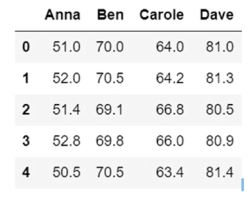

In [54]:
#   5.1. Создайте из таблицы  DataFrame.

# ваш код
data = {
    'Anna': [51, 52, 51.4, 52.8, 50.5],
    'Ben': [70, 70.5, 69.1, 69.8, 70.5],
    'Carole': [64, 62.2, 66.8, 66, 63.4],
    'Dave': [81, 81.3, 80.5, 80.9, 81.4]
}
df = pd.DataFrame(data)
df

,Anna,Ben,Carole,Dave
0,51.0,70.0,64.0,81.0
1,52.0,70.5,62.2,81.3
2,51.4,69.1,66.8,80.5
3,52.8,69.8,66.0,80.9
4,50.5,70.5,63.4,81.4


In [55]:
#  5.2. Преобразуйте этот DataFrame в tidy format.

# ваш код
tidy_df = df.melt(var_name='Name', value_name='Value')
tidy_df

,Name,Value
0,Anna,51.0
1,Anna,52.0
2,Anna,51.4
3,Anna,52.8
4,Anna,50.5
5,Ben,70.0
6,Ben,70.5
7,Ben,69.1
8,Ben,69.8
9,Ben,70.5


In [58]:
#  5.3. Определите, у кого из этих четырех человек было меньше всего колебаний по весу.

# ваш код
tidy_df.groupby('Name').agg({'Value':np.std})

,Value
Name,
Anna,0.893308
Ben,0.580517
Carole,1.889974
Dave,0.356371


Ответ: Dave

In [59]:
#  5.4. Для людей, чей средний вес менее 65 кг, пересчитайте их
#  вес (за все четыре дня) в фунтах и отобразить эти данные.

# ваш код
# функция перевода в фунты
def kg_to_pounds(weight_kg):
    return weight_kg * 2.20462

df_filtered = tidy_df.groupby('Name')['Value'].mean().reset_index()
df_filtered = df_filtered[df_filtered['Value'] < 65]
df_filtered['Value'] = df_filtered['Value'].apply(kg_to_pounds)

df_filtered

,Name,Value
0,Anna,113.626115
2,Carole,142.153898
